In [93]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib . pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Ex1

In [94]:
df = pd.read_csv("cleveland.csv")
print(df.head(3))

   63  1  1.1  145  233  1.2  2  150  0  2.3  3  0.1    6  0.2
0  67  1    4  160  286    0  2  108  1  1.5  2  3.0  3.0    2
1  67  1    4  120  229    0  2  129  1  2.6  2  2.0  7.0    1
2  37  1    3  130  250    0  0  187  0  3.5  3  0.0  3.0    0


In [95]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   63      302 non-null    int64  
 1   1       302 non-null    int64  
 2   1.1     302 non-null    int64  
 3   145     302 non-null    int64  
 4   233     302 non-null    int64  
 5   1.2     302 non-null    int64  
 6   2       302 non-null    int64  
 7   150     302 non-null    int64  
 8   0       302 non-null    int64  
 9   2.3     302 non-null    float64
 10  3       302 non-null    int64  
 11  0.1     298 non-null    float64
 12  6       300 non-null    float64
 13  0.2     302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB
None


In [96]:
print(df.describe())

               63           1         1.1         145         233         1.2  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.410596    0.678808    3.165563  131.645695  246.738411    0.145695   
std      9.040163    0.467709    0.953612   17.612202   51.856829    0.353386   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     55.500000    1.000000    3.000000  130.000000  241.500000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

                2         150           0         2.3           3         0.1  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  298.000000   
mean     0.986755  149.605960    0.327815    1.035430    1.596026    0.674497   
std      0.994916   22.9129

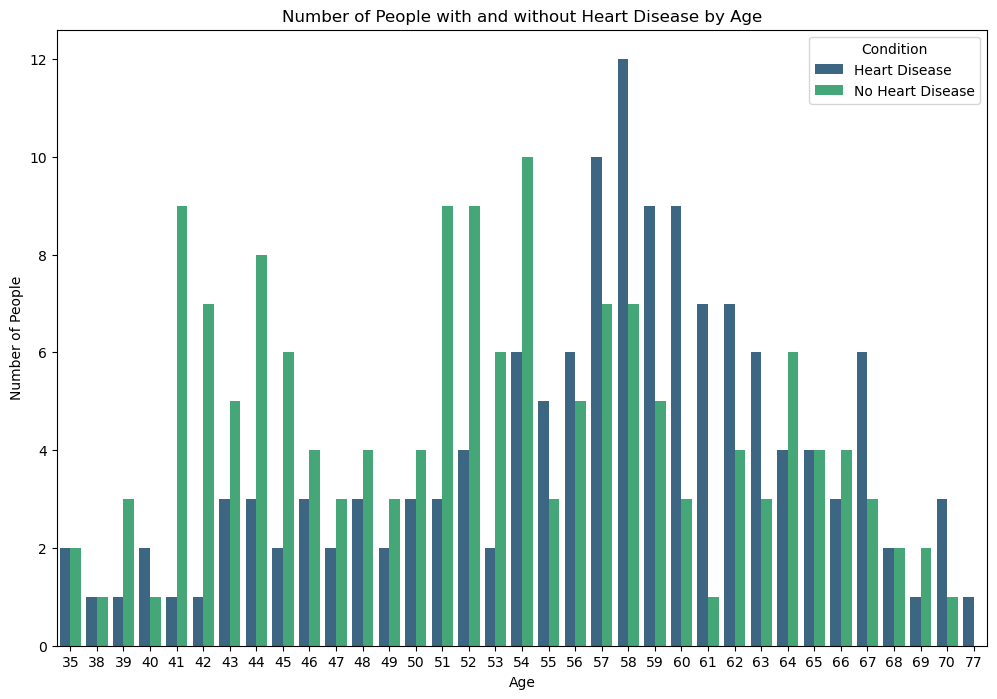

In [97]:
file_path = 'cleveland.csv'
df = pd.read_csv ('cleveland.csv', header = None )

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
    'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target']

df['target'] = df.target.map ({0: 0 , 1: 1 , 2: 1 , 3: 1 , 4: 1})
df['thal'] = df.thal.fillna ( df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
           'oldpeak', 'slope', 'ca', 'thal', 'target']

df.columns = columns

heart_disease_counts = df[df['target'] == 1]['age'].value_counts().sort_index()
no_heart_disease_counts = df[df['target'] == 0]['age'].value_counts().sort_index()

age_df = pd.DataFrame({
    'Age': heart_disease_counts.index,
    'Heart Disease': heart_disease_counts.values,
    'No Heart Disease': no_heart_disease_counts.reindex(heart_disease_counts.index, fill_value=0).values
})

# Chuyển dữ liệu từ dạng wide sang long để dễ vẽ với seaborn
age_df_melted = age_df.melt(id_vars='Age', value_vars=['Heart Disease', 'No Heart Disease'], 
                            var_name='Condition', value_name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Count', hue='Condition', data=age_df_melted, palette='viridis')

plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Number of People with and without Heart Disease by Age')

plt.xticks(rotation=0)
plt.show()

# Ex2

<Figure size 1200x800 with 0 Axes>

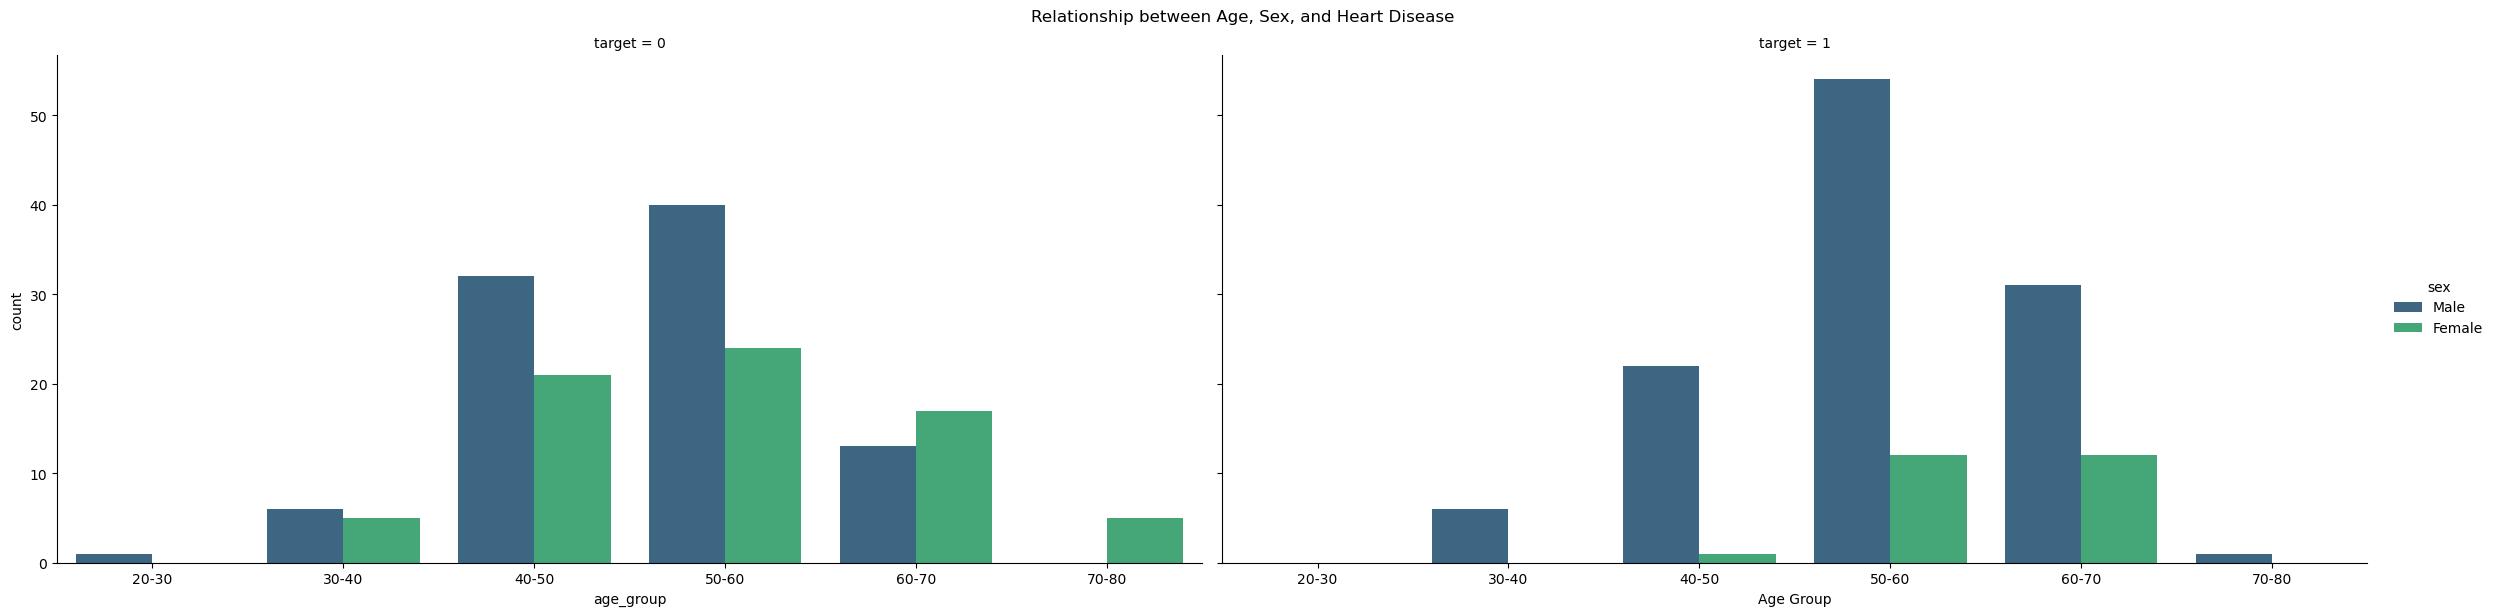

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'cleveland.csv'
df = pd.read_csv(file_path, header=None)

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
    'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target']

df['target'] = df.target.map ({0: 0 , 1: 1 , 2: 1 , 3: 1 , 4: 1})
df['thal'] = df.thal.fillna ( df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
           'oldpeak', 'slope', 'ca', 'thal', 'target']
df.columns = columns

df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})

df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80], 
                           labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

plt.figure(figsize=(12, 8))
sns.catplot(x='age_group', hue='sex', col='target', 
            data=df, kind='count', palette='viridis', height=6, aspect=2)

plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.suptitle('Relationship between Age, Sex, and Heart Disease', y=1.02)

plt.show()

# Ex3 
* KNN Classification

In [99]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,Male,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,60-70
1,67,Male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,60-70
2,67,Male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,60-70
3,37,Male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,30-40


In [100]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

In [101]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target age_group  
0  0.0   6.0       0     60-70  
1  3.0   3.0       1     60-70  
2  2.0   7.0       1     60-70  
3  0.0   3.0       0     30-40  
4  0.0   3.0       0     40-50  


#### age_group mapping

In [102]:
age_group_mapping = {
    '20-30': 1,
    '30-40': 2,
    '40-50': 3,
    '50-60': 4,
    '60-70': 5,
    '70-80': 6
}

df['age_group_numeric'] = df['age_group'].map(age_group_mapping)

print("\nAfter mapping:")
print(df)


After mapping:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope        ca  thal  target age_group age_group_numeric  
0     

In [103]:
df_copy = df.drop('age_group', axis=1)
X = df_copy.iloc[: , : -1].values
y = df_copy.iloc[: , -1].values

from sklearn . model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,random_state = 42)

In [104]:
X_train[0]

array([ 29.,   1.,   2., 130., 204.,   0.,   2., 202.,   0.,   0.,   1.,
         0.,   3.,   0.])

In [105]:
knn = KNeighborsClassifier(n_neighbors = 5,
                           weights = 'uniform', 
                           algorithm ='auto', 
                           leaf_size = 30, 
                           metric ='minkowski')

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f'Accucary KNN: {accuracy_score(y_pred, y_test)}')

Accucary KNN: 0.5573770491803278


In [106]:
print(len(y_test))
print(len(y_pred))

61
61


In [107]:
cm_train = confusion_matrix(y_test, y_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)

print("Ma trận nhầm lẫn cho tập huấn luyện:")
print(cm_train)
print(f'Accuracy for training set for Naive Bayes = {accuracy_for_train}')

Ma trận nhầm lẫn cho tập huấn luyện:
[[ 1  4  1  0  0]
 [ 0 11  2  2  0]
 [ 0  4 19  6  0]
 [ 0  0  7  3  0]
 [ 0  0  1  0  0]]
Accuracy for training set for Naive Bayes = 0.05


# Ex3

In [109]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của SVM: {accuracy}")

Độ chính xác của SVM: 0.9836065573770492


# Ex4

In [110]:
from sklearn.naive_bayes import GaussianNB

# Khởi tạo mô hình Naive Bayes
nb = GaussianNB()

# Huấn luyện mô hình
nb.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = nb.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của Naive Bayes: {accuracy}")

Độ chính xác của Naive Bayes: 0.7540983606557377


# Ex5

# Ex6

# Ex7

# Ex8

# Ex9